In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("TZ.csv")
df.head()

,ID,ID_клиента,фамилия,кредитный_рейтинг,город,пол,возраст,стаж_в_банке,баланс_депозита,число_продуктов,есть_кредитка,активный_клиент,оценочная_зарплата,ушел_из_банка
0,0,15709511.0,Тестов55,754.0,Астана,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,1,15592761.0,Тестов539,579.0,Алматы,Female,28.0,1.0,NaN,2.0,1.0,0.0,64869.32,0.0
2,2,15579914.0,Тестов275,744.0,Алматы,Female,56.0,5.0,NaN,1.0,1.0,0.0,158816.03,1.0
3,3,15669611.0,Есенгельдиев,697.0,Алматы,Male,29.0,2.0,NaN,2.0,1.0,0.0,55775.72,0.0
4,4,15761775.0,Тестов451,628.0,Алматы,Female,22.0,9.0,NaN,2.0,1.0,0.0,49653.39,0.0


In [ ]:
df.shape


(15000, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15000 non-null  int64  
 1   ID_клиента          15000 non-null  float64
 2   фамилия             15000 non-null  object 
 3   кредитный_рейтинг   15000 non-null  float64
 4   город               15000 non-null  object 
 5   пол                 15000 non-null  object 
 6   возраст             15000 non-null  float64
 7   стаж_в_банке        15000 non-null  float64
 8   баланс_депозита     5316 non-null   float64
 9   число_продуктов     15000 non-null  float64
 10  есть_кредитка       15000 non-null  float64
 11  активный_клиент     15000 non-null  float64
 12  оценочная_зарплата  15000 non-null  float64
 13  ушел_из_банка       15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df = df.rename(columns={
    "ID": "id",
    "ID_клиента": "customer_id",
    "фамилия": "last_name",
    "кредитный_рейтинг": "credit_score",
    "город": "city",
    "пол": "gender",
    "возраст": "age",
    "стаж_в_банке": "tenure",
    "баланс_депозита": "balance",
    "число_продуктов": "num_products",
    "есть_кредитка": "has_credit_card",
    "активный_клиент": "is_active",
    "оценочная_зарплата": "estimated_salary",
    "ушел_из_банка": "churn"
})


In [ ]:
df.head()


,id,customer_id,last_name,credit_score,city,gender,age,tenure,balance,num_products,has_credit_card,is_active,estimated_salary,churn
0,0,15709511.0,Тестов55,754.0,Астана,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,1,15592761.0,Тестов539,579.0,Алматы,Female,28.0,1.0,NaN,2.0,1.0,0.0,64869.32,0.0
2,2,15579914.0,Тестов275,744.0,Алматы,Female,56.0,5.0,NaN,1.0,1.0,0.0,158816.03,1.0
3,3,15669611.0,Есенгельдиев,697.0,Алматы,Male,29.0,2.0,NaN,2.0,1.0,0.0,55775.72,0.0
4,4,15761775.0,Тестов451,628.0,Алматы,Female,22.0,9.0,NaN,2.0,1.0,0.0,49653.39,0.0


In [ ]:
df = df.drop(columns=["id", "customer_id", "last_name"])
df.head()

,credit_score,city,gender,age,tenure,balance,num_products,has_credit_card,is_active,estimated_salary,churn
0,754.0,Астана,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,579.0,Алматы,Female,28.0,1.0,NaN,2.0,1.0,0.0,64869.32,0.0
2,744.0,Алматы,Female,56.0,5.0,NaN,1.0,1.0,0.0,158816.03,1.0
3,697.0,Алматы,Male,29.0,2.0,NaN,2.0,1.0,0.0,55775.72,0.0
4,628.0,Алматы,Female,22.0,9.0,NaN,2.0,1.0,0.0,49653.39,0.0


In [ ]:
df["churn"].value_counts()


,count
churn,
0.0,11942
1.0,3058


**EDA**

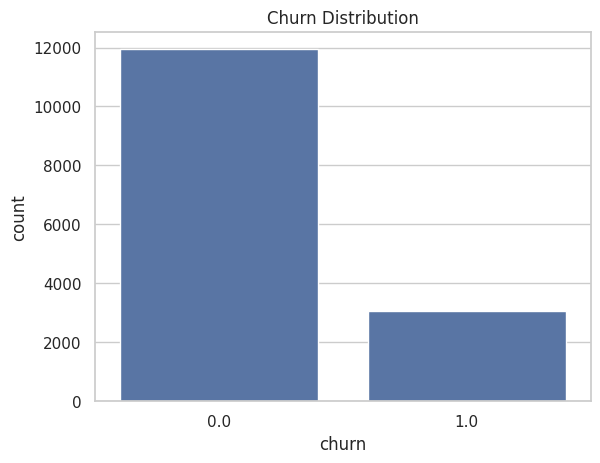

In [ ]:
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
balance,9684
city,0
credit_score,0
gender,0
age,0
tenure,0
num_products,0
has_credit_card,0
is_active,0
estimated_salary,0


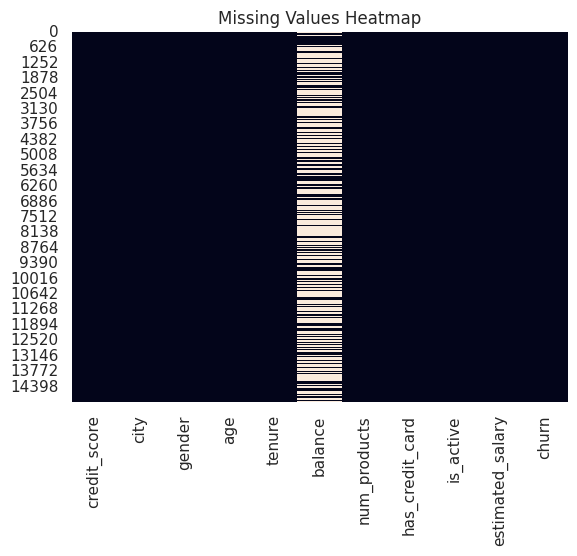

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
target_col='churn'

num_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols=df.select_dtypes(include=['object']).columns.tolist()

num_cols.remove(target_col)
num_cols, cat_cols

(['credit_score',
  'age',
  'tenure',
  'balance',
  'num_products',
  'has_credit_card',
  'is_active',
  'estimated_salary'],
 ['city', 'gender'])

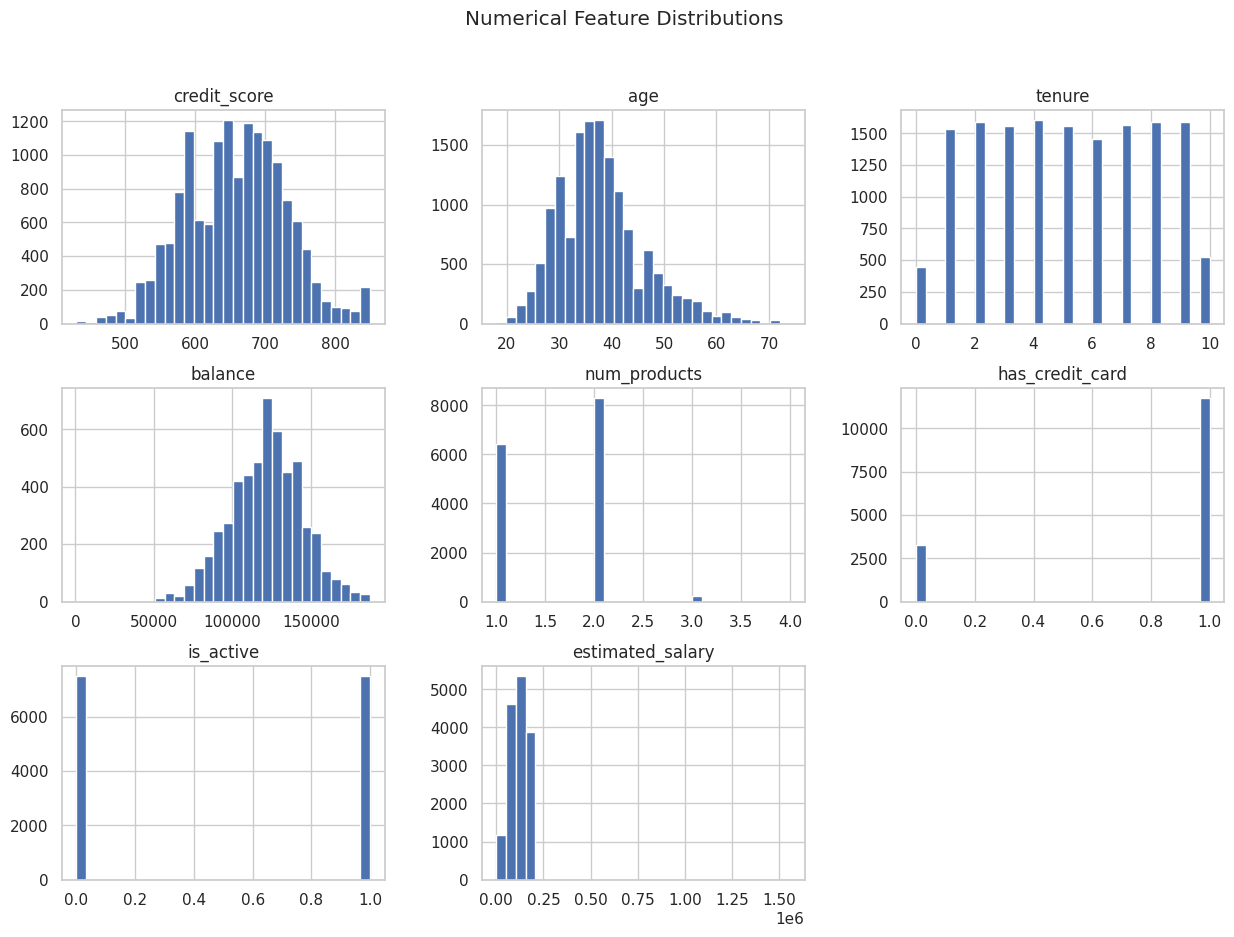

In [ ]:
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()


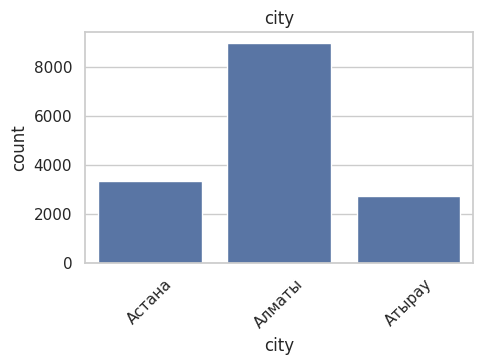

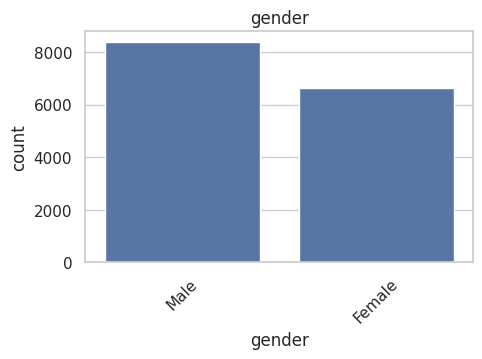

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


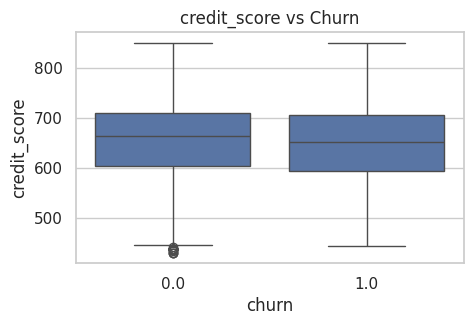

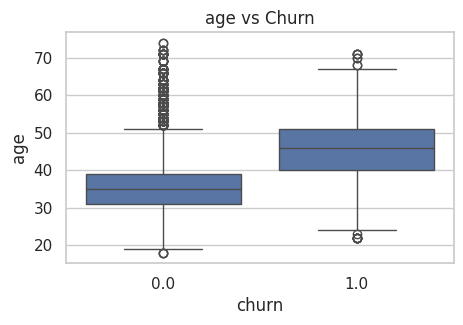

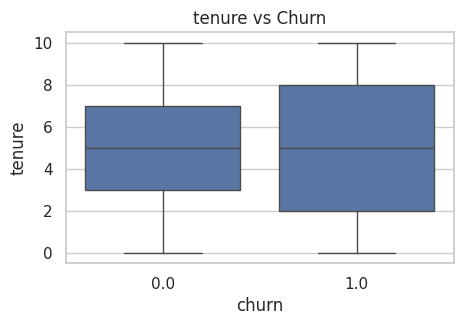

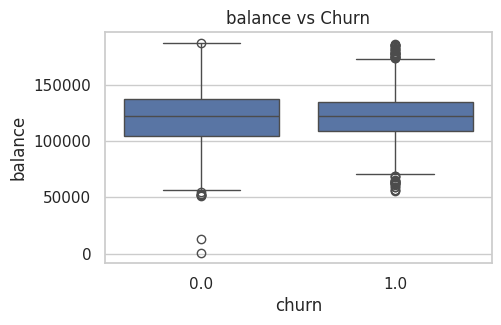

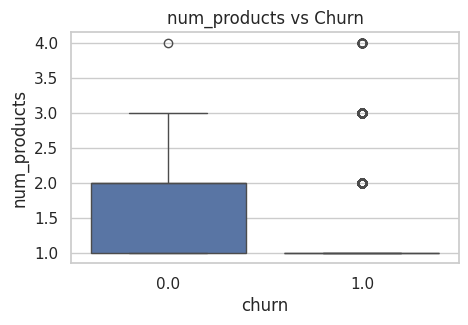

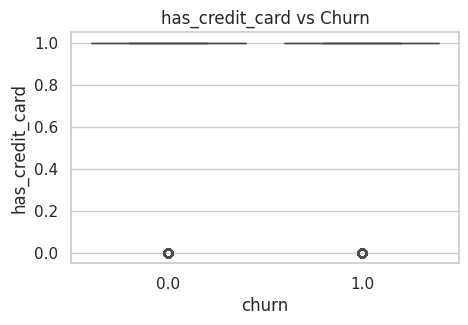

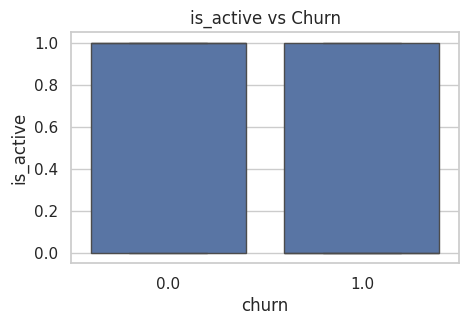

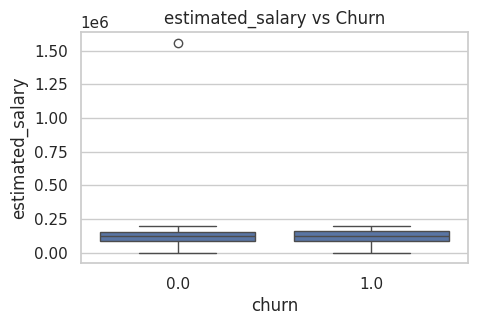

In [ ]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


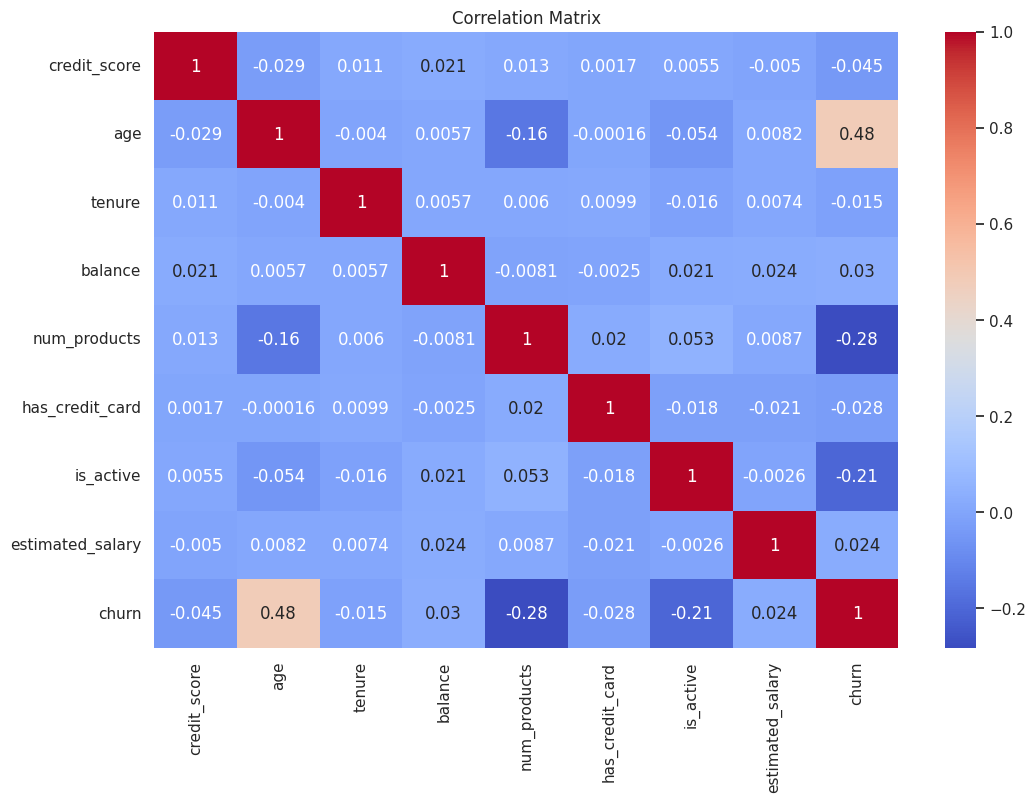

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols + ["churn"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Handling Missing Values**

In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [ ]:
df.isnull().sum().sum()


np.int64(0)

**SPLITTING**

In [ ]:
X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
X_train.shape, X_test.shape


((12000, 10), (3000, 10))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


**Categorical Columns**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


**BUILDING MODEL AND COMPARISON**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])


In [ ]:
rf_model.fit(X_train, y_train)
from sklearn.metrics import (
    classification_report,
    roc_auc_score
)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.9277241326457997
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      2388
         1.0       0.67      0.79      0.73       612

    accuracy                           0.88      3000
   macro avg       0.81      0.84      0.82      3000
weighted avg       0.89      0.88      0.88      3000



In [ ]:
from sklearn.preprocessing import StandardScaler
preprocessor_lr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    ))
])

logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)
y_proba_lr = logreg_model.predict_proba(X_test)[:, 1]
print("Logistic Regression ROC-AUC:",
      roc_auc_score(y_test, y_proba_lr))

print(classification_report(y_test, y_pred_lr))


Logistic Regression ROC-AUC: 0.8806108428854511
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.87      2388
         1.0       0.53      0.80      0.64       612

    accuracy                           0.81      3000
   macro avg       0.73      0.81      0.76      3000
weighted avg       0.86      0.81      0.83      3000



CROSS VALIDATION


In [ ]:
from sklearn.model_selection import cross_val_score
# Logistic Regression CV
cv_lr = cross_val_score(
    logreg_model,
    X_train,
    y_train,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

# Random Forest CV
cv_rf = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)
print("Logistic Regression CV ROC-AUC:")
print(f"Mean: {cv_lr.mean():.4f}, Std: {cv_lr.std():.4f}")

print("\nRandom Forest CV ROC-AUC:")
print(f"Mean: {cv_rf.mean():.4f}, Std: {cv_rf.std():.4f}")


Logistic Regression CV ROC-AUC:
Mean: 0.8872, Std: 0.0105

Random Forest CV ROC-AUC:
Mean: 0.9263, Std: 0.0082


**FEATURE IMPORTANCE**

In [ ]:
import shap
# Extract preprocessor and model
preprocessor_fitted = rf_model.named_steps["preprocessor"]
rf_fitted = rf_model.named_steps["model"]
X_train_transformed = preprocessor_fitted.transform(X_train)
# Get numeric feature names
num_features = num_cols

# Get categorical feature names
cat_features = (
    preprocessor_fitted
    .named_transformers_["cat"]
    .get_feature_names_out(cat_cols)
)

# Combine all feature names
feature_names = list(num_features) + list(cat_features)
X_train_transformed.shape, len(feature_names)


((12000, 13), 13)

In [ ]:
preprocessor_fitted = rf_model.named_steps["preprocessor"]
rf_fitted = rf_model.named_steps["model"]
X_train_transformed = preprocessor_fitted.transform(X_train)


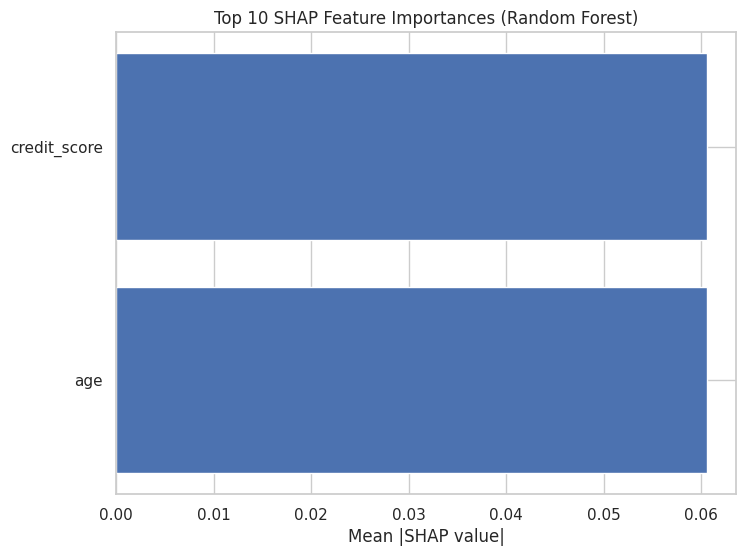

In [ ]:
explainer = shap.TreeExplainer(rf_fitted)
X_sample = X_train_transformed[:300]  # small = stable
shap_values = explainer.shap_values(X_sample)
import numpy as np
import pandas as pd

mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)
shap_importance = pd.DataFrame({
    "feature": feature_names[:len(mean_abs_shap)],
    "importance": mean_abs_shap
}).sort_values(by="importance", ascending=False)
plt.figure(figsize=(8,6))
plt.barh(
    shap_importance["feature"].head(10)[::-1],
    shap_importance["importance"].head(10)[::-1]
)
plt.title("Top 10 SHAP Feature Importances (Random Forest)")
plt.xlabel("Mean |SHAP value|")
plt.show()


In [ ]:
import joblib
joblib.dump(rf_model, "churn_model.pkl")


['churn_model.pkl']

In [ ]:
loaded_model = joblib.load("churn_model.pkl")

# Test on one sample
sample = X_test.iloc[[0]]

loaded_model.predict_proba(sample)


array([[0.21521241, 0.78478759]])